# Python - APIs

**Author:** Nina Rauscher

*Girls Who Code - Class 3 - Week 5 - 11/18/2023*

Today, we will learn **how to retrieve data from an API**. We will start by reviewing the basics of an API before playing with Yelp API :)

This will help you build personal projects using APIs (Spotify, Maps, ...) and showcase your skills when applying to college.

## API 101

### Definition

API stands for **Application Programming Interface**. But what does that really mean?

Imagine you go to a restaurant. You don't need to know how the chef prepares your dish; you just need to know what to ask for. In this analogy, the menu is like an API - it's a way for you to request specific dishes without worrying about the details of how they are made.

In the world of programming, an API is like a menu for different software applications. It defines the ways that different software components should interact.

### Why are APIs so important?

As explained with the menu analogy, APIs are crucial to simplify communication between the client (your Python application in our class) and the chef (an external system such as a database).

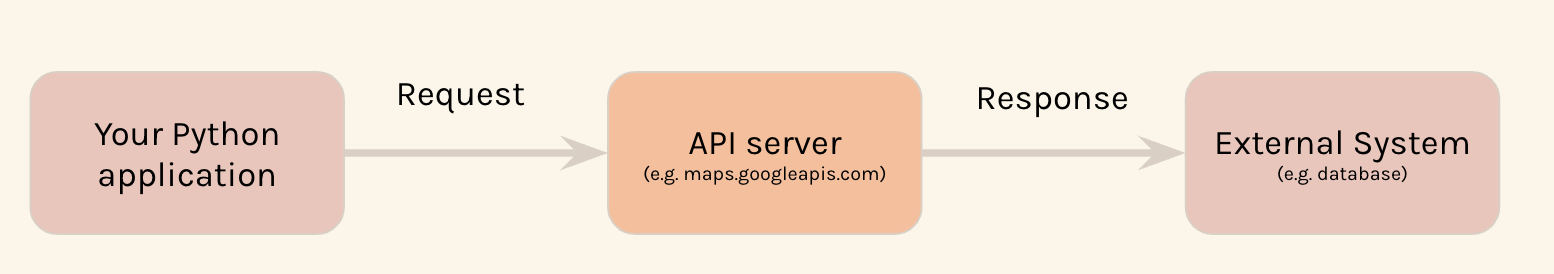


The **2 main benefits** of using an API are thus:

* **Easy communication between programs**: APIs enable different software programs to talk to each other. Just like you order food from a menu, one program can request specific data or actions from another program through an API *(see the flowchart above)*

* **Reuse of code**: Developers can use APIs to reuse code that someone else has written. This saves time and effort, allowing programmers to focus on specific features without reinventing the wheel.

### Making a request to an API in Python

When interacting with many APIs, especially those that involve accessing specific services or resources, you often need to authenticate yourself. This is where **API keys** come into play.

In Python, you can include your API key in the request headers to authenticate yourself. Here's an example:

In [ ]:
import requests

# Replace 'YOUR_API_KEY' with your actual API key
api_key = 'YOUR_API_KEY'

# Define the API endpoint
url = "https://api.example.com/data"

# Include the API key in the headers
headers = {'Authorization': f'Bearer {api_key}'}

# Make a request to the API
response = requests.get(url, headers=headers) # This won't work in practice as we are working with fake API and API keys in this code

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Print the response content
    print("API Response:")
    print(response.text)
else:
    print(f"Error: {response.status_code}")

In this example, we've added an **Authorization header** to the request, including your API key. This key acts as a **unique identifier**, allowing the API server to recognize and authenticate your requests.

**How do we get these API keys?**

API keys are typically provided by the service you are interacting with. It's essential to keep your API keys secure and not share them publicly. **Treat them like passwords.**

As you explore APIs in Python, you'll often find **documentation** from the API provider explaining how to obtain and use API keys. Each service may have its own authentication mechanism, so make sure to refer to the specific documentation for the API you're working with.

## Yelp API

Today, we'll use **Yelp Fusion API** to find information on the restaurants in NYC! If you don't have a Yelp account yet, please go to this [web page](https://docs.developer.yelp.com/docs/fusion-intro) and create one.

Once you have created your account, you can create an API key:
1. Go to [Create App](https://www.yelp.com/developers/v3/manage_app)
2. In the create new app form, enter information about your app, then agree to Yelp API Terms of Use and Display Requirements. Then click the Submit button.
3. You will now have an API Key.


> 🚧 Please keep the API Key to yourself since it is the credential for your call to Yelp's API.



In [ ]:
# Insert your client ID and API key below
CLIENT_ID = ""
API_KEY = ""

Now, let's go back to this [page](https://https://docs.developer.yelp.com/docs/fusion-intro) to explore it together! This corresponds to the documentation we will refer to when we want to understand how the API works and how we can write our requests to get specific responses from it ✨

From the page, we can tell that there are 5 main categories of endpoints:


*   Businesses
*   Reviews
*   Events
*   Categories
*   Brands





In [ ]:
# API constants, you shouldn't have to change these
API_HOST = 'https://api.yelp.com/v3'     # The API url
BUSINESS_SEARCH = '/businesses/search' # The path for a more generic request using keywords or latitude/longitude
PHONE_SEARCH_PATH = '/businesses/search/phone' # The path for a request using the phone number of the business

Let's start by writing a few functions to simplify the creation of the URL we request!

To know the right formatting for the request, Yelp API documentation is great as it enables us to play with the parameters and adapt our request: https://docs.developer.yelp.com/reference/v3_business_search

#### Searching by keyword and location using basic business search

In [ ]:
# We can search restaurants by keyword
def get_restaurants_by_keyword_and_location(api_key, keyword, location):
    import requests
    import json

    search_data = {
        'term': keyword,
        'location': location
    }

    url = API_HOST + BUSINESS_SEARCH

    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    response = requests.request('GET', url, headers=headers, params=search_data).json()
    businesses = response.get('businesses')
    return businesses

In [ ]:
get_restaurants_by_keyword_and_location(API_KEY, "italian", "NYC") # Search Italian restaurants in NYC

[{'id': '16ZnHpuaaBt92XWeJHCC5A',
  'alias': 'olio-e-più-new-york-7',
  'name': 'Olio e Più',
  'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/CUpPgz_Q4QBHxxxxDJJTTA/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/olio-e-pi%C3%B9-new-york-7?adjust_creative=GPuuIzt9tV_SwOSNqOVSrg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GPuuIzt9tV_SwOSNqOVSrg',
  'review_count': 4939,
  'categories': [{'alias': 'pizza', 'title': 'Pizza'},
   {'alias': 'italian', 'title': 'Italian'},
   {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}],
  'rating': 4.5,
  'coordinates': {'latitude': 40.733798036104304,
   'longitude': -73.99977392649927},
  'transactions': ['pickup', 'delivery'],
  'price': '$$',
  'location': {'address1': '3 Greenwich Ave',
   'address2': None,
   'address3': '',
   'city': 'New York',
   'zip_code': '10014',
   'country': 'US',
   'state': 'NY',
   'display_address': ['3 Greenwich Ave', 'New York, NY 10014']},
  'phone': '+1212243

#### Searching by phone number using [phone search](https://docs.developer.yelp.com/reference/v3_business_phone_search)

In [ ]:
# We can also search a restaurant by their phone number
def get_restaurants_by_phone(api_key, phone):
    import requests
    import json

    search_data = {
        'phone': phone
    }

    url = API_HOST + PHONE_SEARCH_PATH

    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    response = requests.request('GET', url, headers=headers, params=search_data).json()
    businesses = response.get('businesses')
    return businesses

In [ ]:
get_restaurants_by_phone(API_KEY, "+12124204900")

[{'id': 'TWH4MjLtN1fKlF-7n6YXHg',
  'alias': 'lil-frankies-new-york',
  'name': "Lil Frankie's",
  'image_url': 'https://s3-media0.fl.yelpcdn.com/bphoto/t0OsEVlzDWgM_NMGVHmPiA/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/lil-frankies-new-york?adjust_creative=GPuuIzt9tV_SwOSNqOVSrg&utm_campaign=yelp_api_v3&utm_medium=api_v3_phone_search&utm_source=GPuuIzt9tV_SwOSNqOVSrg',
  'review_count': 1502,
  'categories': [{'alias': 'pizza', 'title': 'Pizza'},
   {'alias': 'italian', 'title': 'Italian'}],
  'rating': 4.0,
  'coordinates': {'latitude': 40.723625, 'longitude': -73.988555},
  'transactions': ['delivery', 'pickup'],
  'price': '$$',
  'location': {'address1': '19 1st Ave',
   'address2': '',
   'address3': '',
   'city': 'New York',
   'zip_code': '10003',
   'country': 'US',
   'state': 'NY',
   'display_address': ['19 1st Ave', 'New York, NY 10003']},
  'phone': '+12124204900',
  'display_phone': '(212) 420-4900'}]

You will notice that the response we get has a special format. This is called **JSON** for *JavaScript Object Notation*.

### JSON parenthesis

JSON is a lightweight data interchange format. It's easy for humans to read and write, and it's easy for machines to parse and generate. JSON is often used to transmit data between a server and a web application, as well as between different parts of an application.

JSON data is represented as **key-value pairs**, similar to Python dictionaries. Here's a basic example:


```
{
  "person": {
    "name": "Jane Doe",
    "age": 30,
    "address": {
      "city": "Sampleville",
      "zipcode": "12345"
    }
  }
}
```

Here, "person" contains **nested information** about the name, age, and address of an individual.

As you delve into the world of APIs, you'll frequently encounter JSON. Understanding its structure will be crucial as you extract and manipulate data from various sources. Get ready to explore the power of JSON in your programming journey! 🚀

### Back to Yelp API...

In [ ]:
# Get up to 3 reviews concatenated per business knowing the restaurant id
def get_restaurant_review(api_key, restaurant_id):
    import json
    import requests

    business_path = "/businesses/" + restaurant_id + "/reviews"
    url = API_HOST + business_path

    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    response = requests.request('GET', url, headers=headers).json()

    review_text = []

    for review in response['reviews']:
      review_text.append(review['text'])

    return review_text

In [ ]:
# Using the restaurant id
get_restaurant_review(API_KEY,'TWH4MjLtN1fKlF-7n6YXHg')

["After spraining my ankle pretty badly in my 10pm mens league game, my roommate and USC Basketball Hall of Famer took me to Lil Frankie's to cheer me up and...",
 "During my short visit to New York, I met up with some old friends in the neighborhood who suggested Lil Frankie's for dinner. My experience was...",
 'Went out to a concert at Madison Square Garden two nights ago. After we left it was around 11:30pm. We were in the market for some Italian food / pizza....']

In [ ]:
# Using the alias
get_restaurant_review(API_KEY,'lil-frankies-new-york')

["After spraining my ankle pretty badly in my 10pm mens league game, my roommate and USC Basketball Hall of Famer took me to Lil Frankie's to cheer me up and...",
 "During my short visit to New York, I met up with some old friends in the neighborhood who suggested Lil Frankie's for dinner. My experience was...",
 'Went out to a concert at Madison Square Garden two nights ago. After we left it was around 11:30pm. We were in the market for some Italian food / pizza....']

### Your turn!

1. Modify the get_restaurants_by_keyword_and_location() function to include a price criteria -> you need to slightly change the arguments and the code inside the function

In [ ]:
def get_restaurants_by_keyword_location_and_price(...): # YOUR ARGUMENTS
  # YOUR CODE HERE

In [ ]:
#### SOLUTION ####
def get_restaurants_by_keyword_location_and_price(api_key, keyword, location, price):
    import requests
    import json

    search_data = {
        'term': keyword,
        'location': location,
        'price': price
    }

    url = API_HOST + BUSINESS_SEARCH

    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    response = requests.request('GET', url, headers=headers, params=search_data).json()
    businesses = response.get('businesses')
    return businesses

2. Choose one of the endpoints we didn't work on together and write a function to generate responses using this endpoint

> (Refer to [this page](https://docs.developer.yelp.com/docs/fusion-intro) for inspiration)

In [ ]:
# YOUR FUNCTION HERE